# **Bangladesh Flood Guard Project**

**Problem Statement**
* The aftermath of flooding in Bangladesh results in immediate and long-term challenges, including loss of lives, destruction of crops, damage to infrastructure, and displacement of communities. Timely and accurate flood prediction and waterbody forecasting are crucial for reducing the impact of floods, enabling better disaster preparedness, and facilitating effective resource allocation.

* To reduce the impact of flooding in Bangladesh, machine learning models were developed to forecast the average rainfall in four central divisions: Dhaka, Khulna, Mymensingh, and Narayanganj.

**Overview of the Model Evaluation**
* The total of 12 models were created and evaluated:
* CatBoostRegressor, RandomForestRegressor, and XGBRFRegressor were selected to evaluate.
* Four models were developed for each algorithm:
    1. Default parameters with all features
    2. Hyperparameters tuned using RandomizedSearch with all features
    3. Default parameters with the RFE selected features
    2. Hyperparameters tuned using RandomizedSearch with the RFE selected features

**Hyperparameter tuned RandomForestRegressor model with the all features** scored the highest performance metrics
* Hyperparameters for the best model: 
    * 'n_estimators': 1000
    * 'min_samples_split': 5
    * 'min_samples_leaf': 4
    * 'max_features': 'sqrt'
    * 'max_depth': 90
    * 'bootstrap': True

|R2|MAE|MSE|RMSE|
| --- | --- | --- | --- |
|0.705606|2.331859|19.501526|4.416053|

## **Import Module**

In [6]:
# !pip install h5py

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB 435.7 kB/s eta 0:00:07
   - -------------------------------------- 0.1/2.7 MB 653.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/2.7 MB 1.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.7 MB 1.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.7 MB 1.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.7 MB 1.4 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.7 MB 1.4 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.7 MB 1.4 MB/s eta 0:00:02
   --------- ------------------------------ 0.6/2.7 MB 1.5 MB/s eta 0:00:02
   ---------- ----------------------------- 0.7/2.7 MB 1.6 MB/s eta 0:00:02
   ----------- ---------------------------- 0.7/2.7 MB 1.4 MB/s eta 0:00:02
   ------------ ------


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pickle
import joblib
# import h5py
from pathlib import Path
import math
from datetime import datetime
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

# Import modules
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.feature_selection import RFECV

from sklearn.pipeline import Pipeline

import shap
shap.initjs()

## **Set Environment**

In [2]:
# Set pd.options to add slide bars
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [ ]:
# Set up directory
# working_directory = Path.cwd()
# data_directory = working_directory/"data"
# data_directory = working_directory/"drive/MyDrive/Nigeria Enhancing Maternal Health/data/_data"

## **Load Data**

In [3]:
df = pd.read_csv("../data/processed/dhaka_khulna_mymensingh_narayanganj_2013_2023_all_combined.csv", parse_dates=['datetime'])

## **Descriptive Statistics**

In [4]:
df.shape

(15524, 39)

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,15524,2018-04-25 00:00:00,2013-01-01 00:00:00,2015-08-29 00:00:00,2018-04-25 00:00:00,2020-12-20 00:00:00,2023-08-17 00:00:00,NaN
temp,15524.0,25.898396,10.6,22.666667,27.2,29.1,39.166667,4.649778
feelslike,15524.0,27.949029,9.4,22.6,28.6,33.5,43.3,6.454771
dew,15524.0,29.772823,-1.7,18.1,24.7,27.5,77.5,18.2183
humidity,15524.0,70.087619,11.1,61.3,73.2,83.5,98.2,17.207606
precip,15524.0,5.43504,0.0,0.0,0.048,5.1,266.5,13.020302
precipprob,15524.0,52.531564,0.0,0.0,100.0,100.0,100.0,49.937479
precipcover,15524.0,34.448524,0.0,0.0,8.33,75.0,100.0,40.18528
snow,2340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snowdepth,2345.0,0.024606,0.0,0.0,0.0,0.0,24.0,0.671351


In [36]:
df.describe(include='object').T

,count,unique,top,freq
preciptype,8158,1,rain,8158
sunrise,15524,15505,2015-01-16T06:44:47,2
sunset,15524,15504,2020-05-21T18:38:20,2
conditions,15524,7,"Rain, Partially cloudy",6447
description,12496,45,Clear conditions throughout the day.,3365
Division,15524,4,Dhaka,3881


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15524 entries, 0 to 15523
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   datetime                    15524 non-null  datetime64[ns]
 1   temp                        15524 non-null  float64       
 2   feelslike                   15524 non-null  float64       
 3   dew                         15524 non-null  float64       
 4   humidity                    15524 non-null  float64       
 5   precip                      15524 non-null  float64       
 6   precipprob                  15524 non-null  float64       
 7   precipcover                 15524 non-null  float64       
 8   preciptype                  8158 non-null   object        
 9   snow                        2340 non-null   float64       
 10  snowdepth                   2345 non-null   float64       
 11  windgust                    2763 non-null   float64   

**Null analysis**
* Drop 'preciptype', 'snow', 'snowdepth', 'description'
* 'sealevelpressure' --> Fill the mean 
* The pattern of 'visibility' and 'windgust' were changed after 2020, it can be assumed that changes could have made to the system 
* 'severerisk' first appeared in January 2020
* Drop 'severerisk', 'visibility' and 'windgust'

In [42]:
# Check columns that have at least one null
df.isna().sum()

datetime                         0
temp                             0
feelslike                        0
dew                              0
humidity                         0
precip                           0
precipprob                       0
precipcover                      0
winddir                          0
sealevelpressure              1205
cloudcover                       0
solarradiation                   0
solarenergy                      0
uvindex                          0
sunrise                          0
sunset                           0
moonphase                        0
conditions                       0
river_discharge                  0
weathercode                      0
temperature_2m_mean              0
apparent_temperature_mean        0
precipitation_sum                0
rain_sum                         0
precipitation_hours              0
et0_fao_evapotranspiration       0
feelslikemin                     0
feelslikemax                     0
windspeed           

In [7]:
null_cols = df.columns[df.isna().sum() > 0]
null_cols

Index(['preciptype', 'snow', 'snowdepth', 'windgust', 'sealevelpressure',
       'visibility', 'severerisk', 'description'],
      dtype='object')

In [4]:
df.drop(['preciptype', 'snow', 'snowdepth', 'description'], axis=1, inplace=True)

In [50]:
df[['sealevelpressure','visibility', 'severerisk', 'windgust']].describe()

,sealevelpressure,visibility,severerisk,windgust
count,14319.000000,14324.000000,2340.000000,2763.000000
mean,1008.231846,5.516434,25.512821,26.009627
std,5.797274,4.585897,21.289497,12.956338
min,991.600000,0.000000,5.000000,4.300000
25%,1003.500000,3.200000,10.000000,16.600000
50%,1008.300000,4.100000,10.000000,23.000000
75%,1013.200000,6.000000,30.000000,33.100000
max,1022.700000,31.000000,100.000000,92.500000


In [51]:
df[['sealevelpressure', 'visibility', 'severerisk', 'windgust']].head()

,sealevelpressure,visibility,severerisk,windgust
0,1011.5,2.1,NaN,NaN
1,1012.6,3.6,NaN,NaN
2,1012.5,2.8,NaN,NaN
3,1011.7,2.3,NaN,NaN
4,1012.1,2.2,NaN,NaN


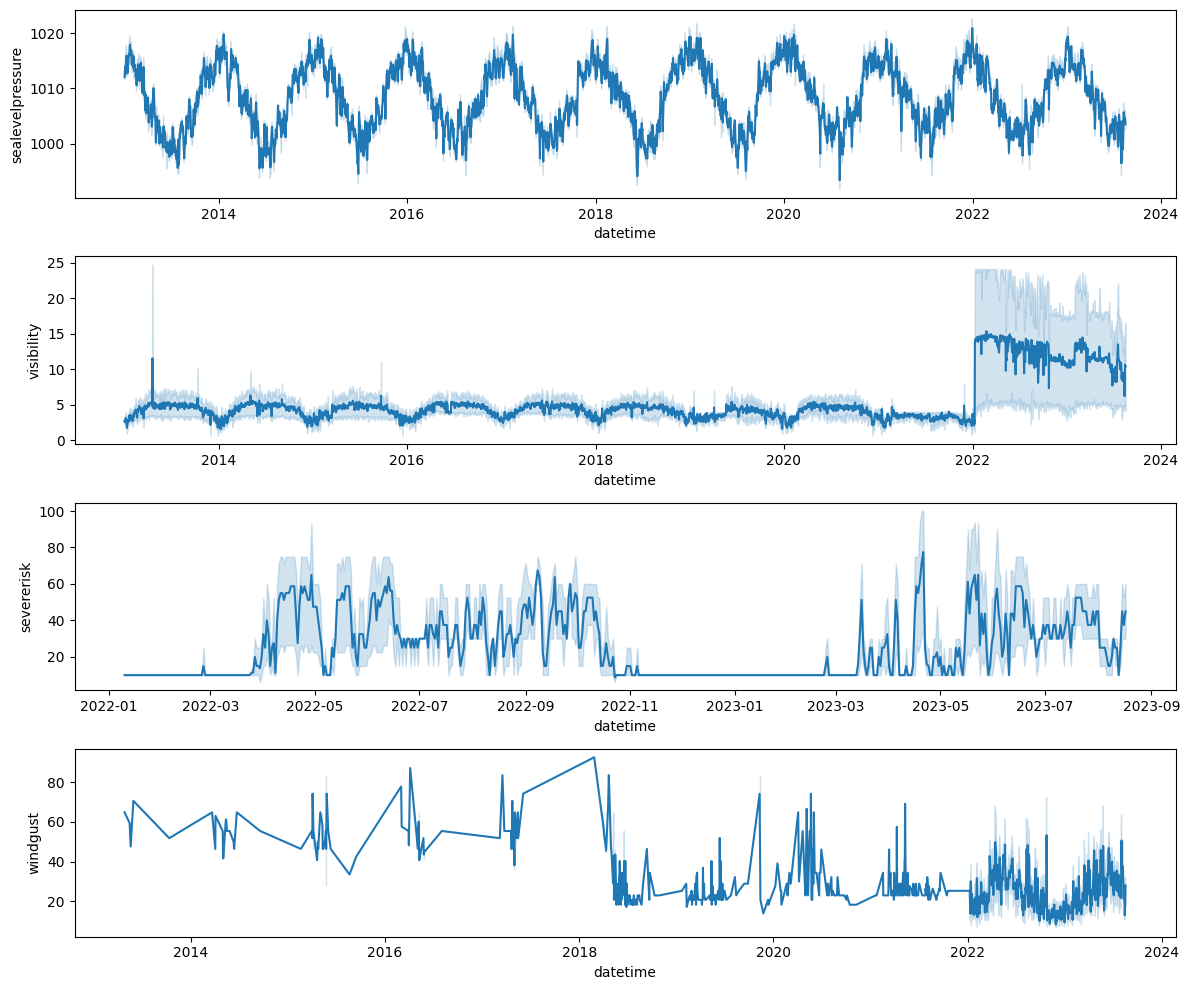

In [5]:
cols = ['sealevelpressure', 'visibility', 'severerisk', 'windgust']
plt.figure(figsize=(12, 10))
for i in range(len(cols)):
    ax = plt.subplot(4, 1, i+1)
    sns.lineplot(x=df['datetime'], y=df[cols[i]], ax=ax)
    plt.tight_layout()

In [52]:
# The first day that the 'severerisk' was recorded
idx = df['severerisk'].notna()
df.loc[idx]['datetime'].min()

Timestamp('2022-01-10 00:00:00')

In [53]:
df.head()

,datetime,temp,feelslike,dew,humidity,precip,precipprob,precipcover,windgust,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,river_discharge,weathercode,temperature_2m_mean,apparent_temperature_mean,precipitation_sum,rain_sum,precipitation_hours,et0_fao_evapotranspiration,feelslikemin,feelslikemax,windspeed,tempmax,tempmin,Division
0,2013-01-01,17.800000,17.800000,12.2,73.1,0.000,0.0,0.00,NaN,301.4,1011.5,27.6,2.1,170.7,14.7,7.0,NaN,2013-01-01T06:40:54,2013-01-01T17:23:03,0.63,Partially cloudy,0.22,0,17.4,17.0,0.0,0.0,0.0,3.01,11.100000,24.30,11.75,24.45,11.35,Dhaka
1,2013-01-01,17.700000,17.700000,9.5,62.1,0.000,0.0,0.00,NaN,332.8,1012.6,5.7,3.6,174.8,15.1,7.0,NaN,2013-01-01T06:42:37,2013-01-01T17:28:15,0.63,Clear,75.03,0,18.9,19.0,0.0,0.0,0.0,3.13,8.500000,26.00,9.40,26.00,9.80,Khulna
2,2013-01-01,16.700000,16.700000,9.8,66.7,0.000,0.0,0.00,NaN,316.3,1012.5,2.0,2.8,163.0,14.2,6.0,NaN,2013-01-01T06:42:59,2013-01-01T17:20:55,0.63,Clear,64.92,2,17.5,17.2,0.0,0.0,0.0,2.78,10.800000,25.10,11.90,25.10,10.80,Mymensingh
3,2013-01-01,21.333333,21.388889,58.1,65.7,0.016,100.0,16.67,NaN,215.7,1011.7,31.0,2.3,115.9,9.9,5.0,NaN,2013-01-01T06:49:46,2013-01-01T17:35:26,0.63,"Rain, Partially cloudy",152.11,2,17.9,17.8,0.0,0.0,0.0,2.96,16.055556,28.50,9.85,23.60,11.80,Narayanganj
4,2013-01-02,18.700000,18.700000,13.0,71.5,0.000,0.0,0.00,NaN,333.7,1012.1,10.4,2.2,167.0,14.3,6.0,NaN,2013-01-02T06:41:12,2013-01-02T17:23:43,0.67,Clear,0.22,2,18.0,18.2,0.0,0.0,0.0,2.90,11.700000,24.95,12.15,24.70,12.00,Dhaka


In [5]:
# Drop 'windgust', 'severerisk'
df.drop(['windgust', 'severerisk', 'visibility'], axis=1, inplace=True)

* Observe distribution of the dataset

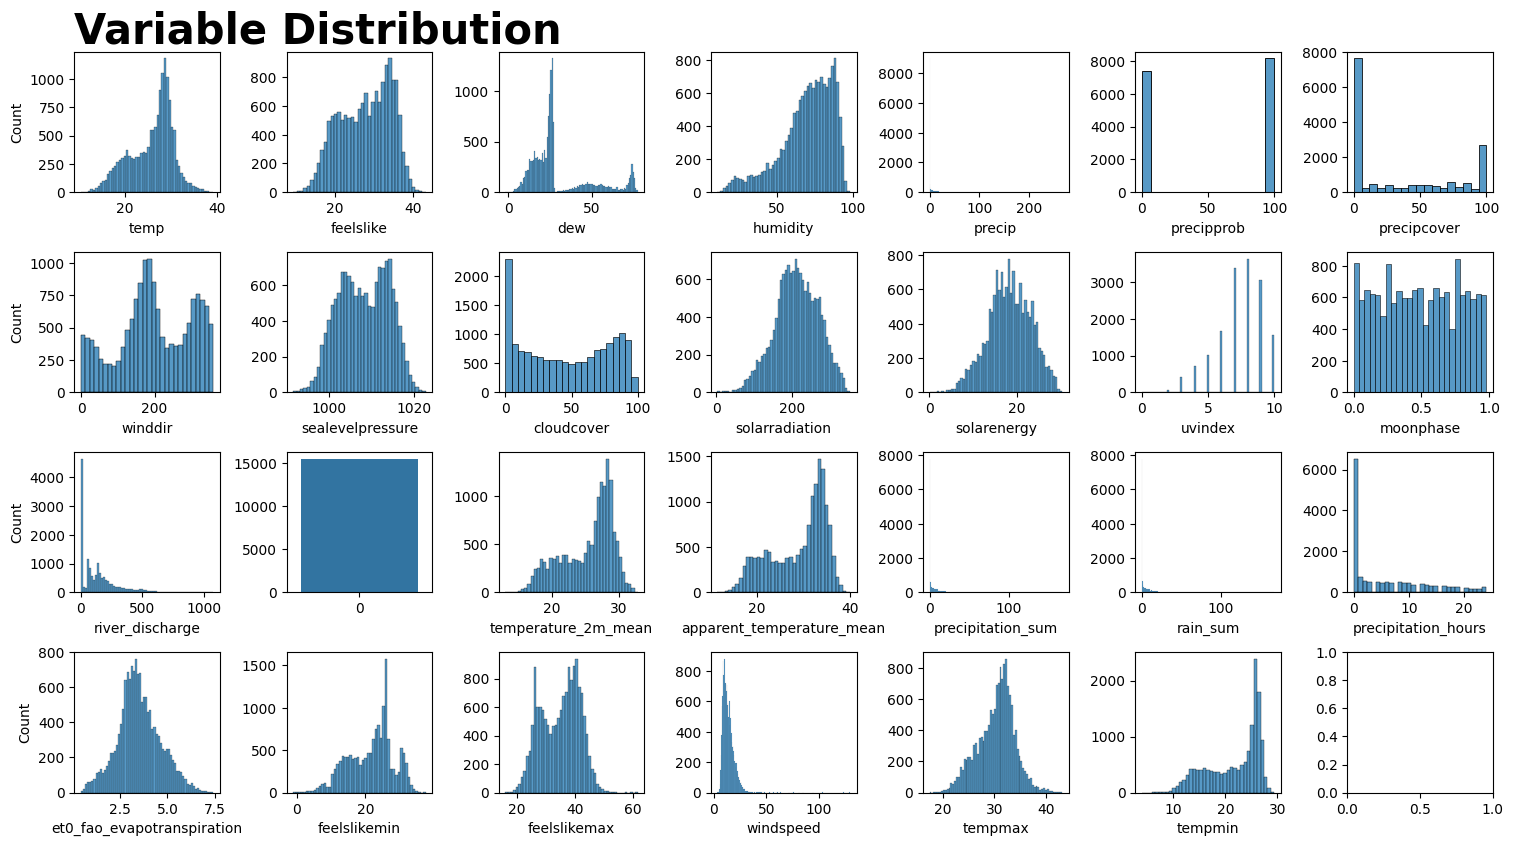

In [8]:
numerical_cols = [col for col in df if df[col].dtypes != 'O'] 

categorical_cols = [col for col in df if df[col].dtypes == 'O'] 
cols = numerical_cols + categorical_cols
cols_to_delete= ['datetime', 'Division', 'sunrise', 'sunset', 'conditions']
cols = [c for c in cols if c not in cols_to_delete]

# Plot distribution of variables
r = 4
c = 7
fig, ax =  plt.subplots(r, c, figsize=(15, 8))
fig.tight_layout(h_pad=2.2)  
plt.text(x=0, y=1.3, s="Variable Distribution", ha='left', va='top', transform=ax[0, 0].transAxes, fontsize=30, fontweight='bold')
for i in range(len(cols)):
    if df[cols[i]].dtype == np.number:
        sns.histplot(df[cols[i]], ax=ax[i//c, i%c])
    else:
        sns.countplot(df[cols[i]], ax=ax[i//c, i%c])
    if i % c != 0:
        ax[i//c, i%c].set_ylabel("");

# **Daily Average 'precip' of 4 Divisions**

## **Preprocess Dataset**
* Get the average of 'precip' for 'Dhaka', 'Khulna', 'Mymensingh', and 'Narayanganj'
* Fill missing 'sealevelpressure' with the previous value

In [6]:
# 'precipitation_sum' and 'rain_sum' are identical --> drop 'precipitation_sum'
df_daily = df.copy()
df_daily.drop(['conditions', 'Division', 'weathercode', 'precipitation_sum', 'sunrise', 'sunset'], axis=1, inplace=True)

In [7]:
# Calculate weekly average for 'sealevelpressure'
cols = df_daily.select_dtypes(exclude='object').columns.to_list()
daily_mean = df_daily.groupby('datetime')[cols].mean()
daily_mean.drop('datetime', axis=1, inplace=True)

In [57]:
daily_mean.head()

,temp,feelslike,dew,humidity,precip,precipprob,precipcover,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,moonphase,river_discharge,temperature_2m_mean,apparent_temperature_mean,rain_sum,precipitation_hours,et0_fao_evapotranspiration,feelslikemin,feelslikemax,windspeed,tempmax,tempmin
datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,18.383333,18.397222,22.400,66.900,0.004,25.0,4.1675,291.550,1012.075,16.575,156.100,13.475,6.25,0.63,73.0700,17.925,17.750,0.000,0.0,2.9700,11.613889,25.975000,10.7250,24.7875,10.9375
2013-01-02,18.791667,18.766667,23.425,69.825,0.002,25.0,2.0825,308.400,1012.750,9.000,149.325,12.825,5.75,0.67,72.5175,18.700,19.225,0.000,0.0,2.8025,12.508333,25.970833,9.4750,25.4500,11.9000
2013-01-03,18.138889,18.097222,21.500,72.125,0.700,50.0,8.3325,161.325,1014.050,24.925,112.750,9.700,4.50,0.70,72.1425,18.375,19.150,0.575,1.5,1.3925,13.229167,24.226389,7.8750,22.9875,15.1125
2013-01-04,18.277778,18.166667,19.625,67.500,0.000,0.0,0.0000,256.400,1014.025,32.775,170.725,14.725,6.25,0.74,68.7625,18.800,19.450,0.000,0.0,2.4750,12.359722,25.948611,11.1125,25.2250,14.4000
2013-01-05,17.047222,16.850000,17.125,61.125,0.000,0.0,0.0000,257.925,1012.600,5.475,174.375,15.125,7.00,0.75,63.9950,17.825,17.525,0.000,0.0,2.9875,9.411111,25.425000,10.4000,24.6000,11.4750


In [8]:
# Fill missing 'sealevelpressure' with the previous value
daily_mean['sealevelpressure'] = daily_mean['sealevelpressure'].fillna(method='ffill')
daily_mean['sealevelpressure'].isna().sum()

0

### **Outlier Analysis**
* 'precip' has 323 outliers that is 8.32% of the entire dataset, which is relatively small, thus outliers will be ignored

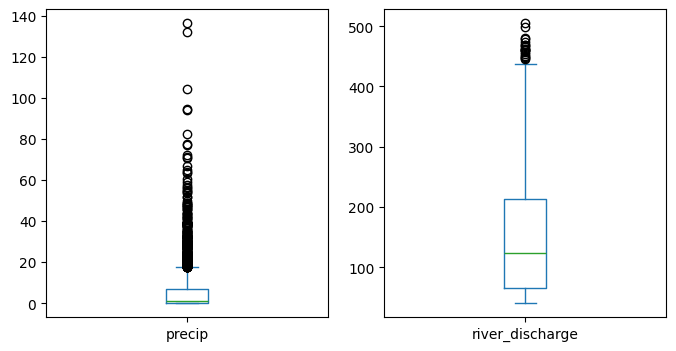

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.title("")
daily_mean['precip'].plot(kind='box', ax=ax1)
daily_mean['river_discharge'].plot(kind='box', ax=ax2);

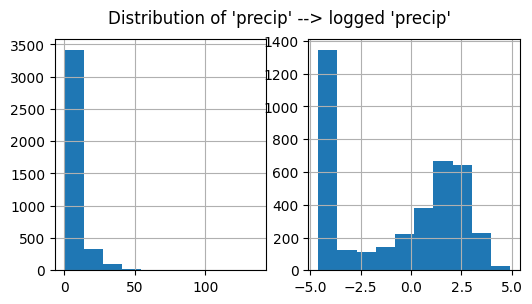

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
plt.suptitle("Distribution of 'precip' --> logged 'precip'")
logged_precip = np.log(daily_mean['precip']+0.01)
daily_mean['precip'].hist(ax=ax1)
logged_precip.hist(ax=ax2);

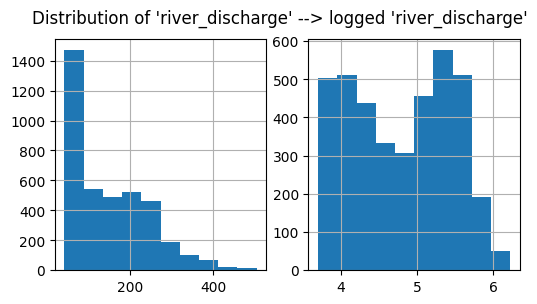

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
plt.suptitle("Distribution of 'river_discharge' --> logged 'river_discharge'")
logged_river_discharge = np.log(daily_mean['river_discharge']+0.01)
daily_mean['river_discharge'].hist(ax=ax1)
logged_river_discharge.hist(ax=ax2);

In [62]:
# Check outliers of 'precip'
q3, q1 = np.percentile(daily_mean['precip'], [75, 25])
iqr = q3 - q1
num_outliers = (daily_mean['precip'] > q3 + iqr*1.5).sum()
print("'precip'")
print("Number of observation", len(daily_mean['precip']))
print("Number of outliers: ", num_outliers)
print("Outlier ratio(%): ", round(num_outliers / len(daily_mean['precip']) * 100, 2))
print("Q3: ", q3, ", Q1: ", q1)
print("Upper threshold: ", q3 + iqr*1.5, "Lower threshold: ", q1 - iqr*1.5)
print("Max: ", daily_mean['precip'].max(), "Min: ", daily_mean['precip'].min())
# df_groupby_div_week

'precip'
Number of observation 3881
Number of outliers:  323
Outlier ratio(%):  8.32
Q3:  7.062 , Q1:  0.0
Upper threshold:  17.655 Lower threshold:  -10.593
Max:  136.425 Min:  0.0


In [63]:
# Check outliers of 'river_discharge'
q3, q1 = np.percentile(daily_mean['river_discharge'], [75, 25])
iqr = q3 - q1
num_outliers = (daily_mean['river_discharge'] > q3 + iqr*1.5).sum()
print("'river_discharge'")
print("Number of observation", len(daily_mean['river_discharge']))
print("Number of outliers: ", num_outliers)
print("Outlier ratio(%): ", round(num_outliers / len(daily_mean['river_discharge']) * 100, 2))
print("Q3: ", q3, ", Q1: ", q1)
print("Upper threshold: ", q3 + iqr*1.5, "Lower threshold: ", q1 - iqr*1.5)
print("Max: ", daily_mean['river_discharge'].max(), "Min: ", daily_mean['river_discharge'].min())
# df_groupby_div_week

'river_discharge'
Number of observation 3881
Number of outliers:  18
Outlier ratio(%):  0.46
Q3:  213.8075 , Q1:  65.08
Upper threshold:  436.89875000000006 Lower threshold:  -158.01125000000002
Max:  505.0475 Min:  40.2925


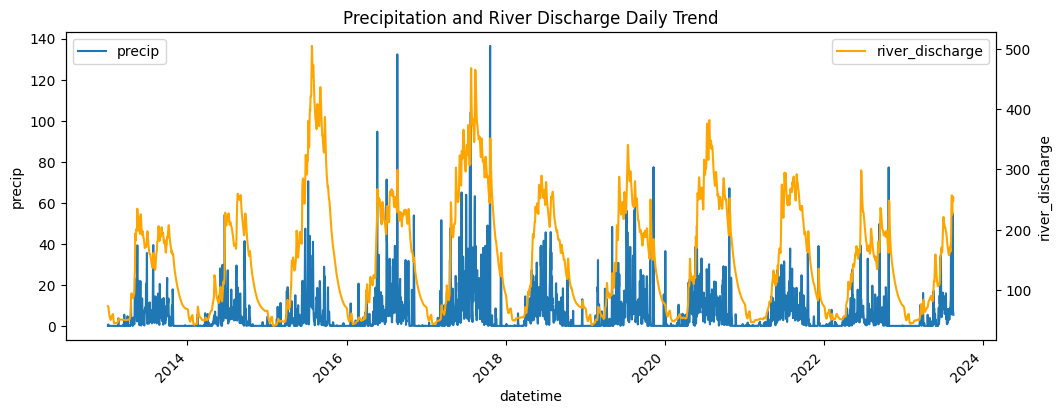

In [64]:
fig, ax1 = plt.subplots(figsize=(12, 4))
ax2 = ax1.twinx()

plt.title("Precipitation and River Discharge Daily Trend")
sns.lineplot(x=daily_mean.index, y=daily_mean['precip'], ax=ax1, label='precip' )
sns.lineplot(x=daily_mean.index, y=daily_mean['river_discharge'], ax=ax2, color='orange', label='river_discharge') 

# ax1.set_xticks(ax1.get_xticks()[::8])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', va='top')
ax1.legend(loc='upper left');

### **Colliniality Analysis**
* Temperature-related features, 'temp', 'feelslike', 'temperature_2m_mean', 'apparent_temperature_mean', 'feelslikemin', 'feelslikemax', 'tempmin', and 'tempmax' show high colliniality
* 'sealevelpressure' has a negative colliniality to 'feelslike', 'temperature_2m_mean', 'apparent_temperature_mean', 'feelslikemin', 'feelslikemax', and 'tempmax'

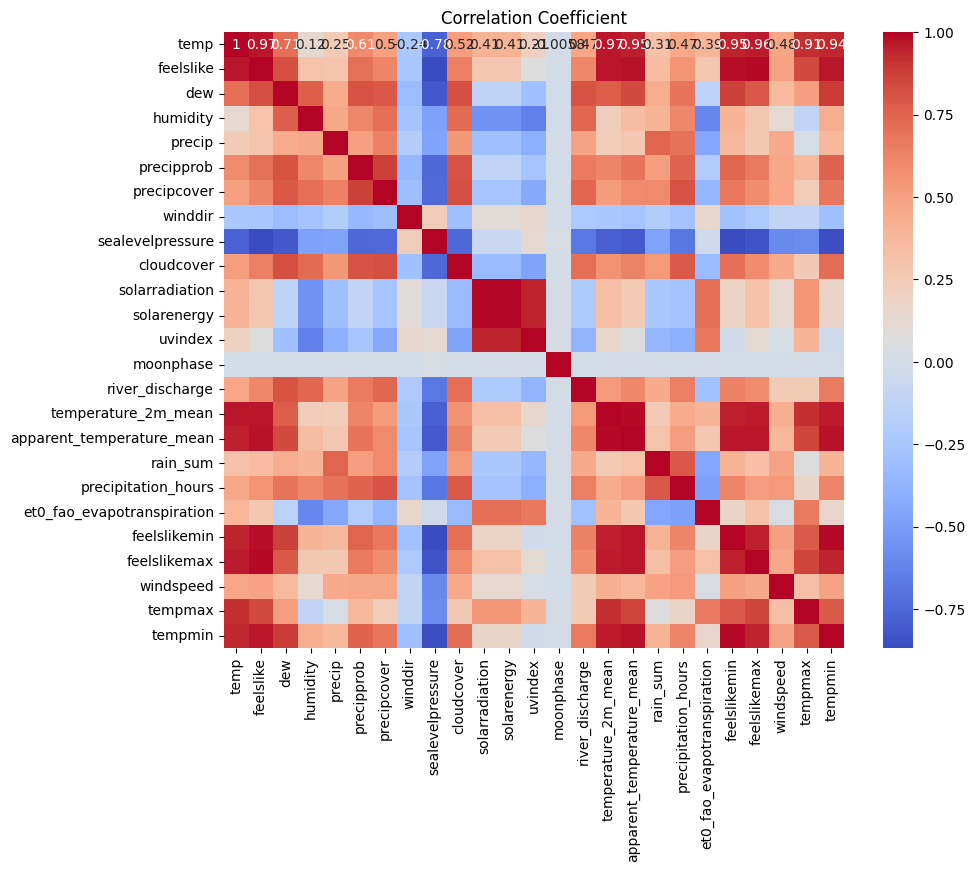

In [65]:
# Observe the correlation
cor = daily_mean.corr()

plt.figure(figsize=(10, 8))
plt.title("Correlation Coefficient")
sns.heatmap(cor, annot=True, cmap='coolwarm');

In [66]:
cor['temp'].sort_values()

sealevelpressure             -0.776848
winddir                      -0.235834
moonphase                    -0.005803
humidity                      0.124976
uvindex                       0.211849
precip                        0.251640
rain_sum                      0.314169
et0_fao_evapotranspiration    0.391505
solarradiation                0.408306
solarenergy                   0.408504
precipitation_hours           0.465432
river_discharge               0.471129
windspeed                     0.479138
precipcover                   0.498490
cloudcover                    0.516178
precipprob                    0.605780
dew                           0.713900
tempmax                       0.913247
tempmin                       0.935638
feelslikemin                  0.946476
apparent_temperature_mean     0.953027
feelslikemax                  0.957863
feelslike                     0.966480
temperature_2m_mean           0.969893
temp                          1.000000
Name: temp, dtype: float6

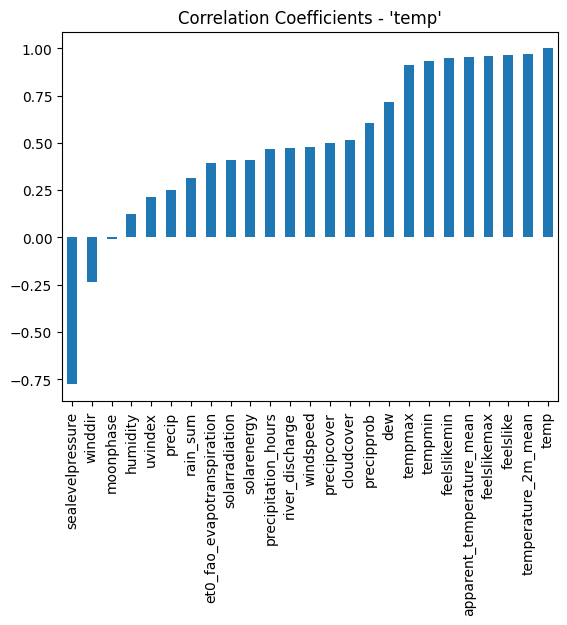

In [67]:
plt.title("Correlation Coefficients - 'temp'")
cor['temp'].sort_values().plot(kind='bar');

In [68]:
cor['sealevelpressure'].sort_values()

feelslikemin                 -0.868105
feelslike                    -0.864824
tempmin                      -0.854170
feelslikemax                 -0.837492
dew                          -0.810918
apparent_temperature_mean    -0.808589
temperature_2m_mean          -0.784275
temp                         -0.776848
cloudcover                   -0.750243
precipprob                   -0.747829
precipcover                  -0.739665
precipitation_hours          -0.683641
river_discharge              -0.675556
windspeed                    -0.595491
tempmax                      -0.590689
humidity                     -0.474586
rain_sum                     -0.470019
precip                       -0.460950
solarenergy                  -0.067232
solarradiation               -0.066904
et0_fao_evapotranspiration   -0.031709
moonphase                     0.024915
uvindex                       0.124746
winddir                       0.226902
sealevelpressure              1.000000
Name: sealevelpressure, d

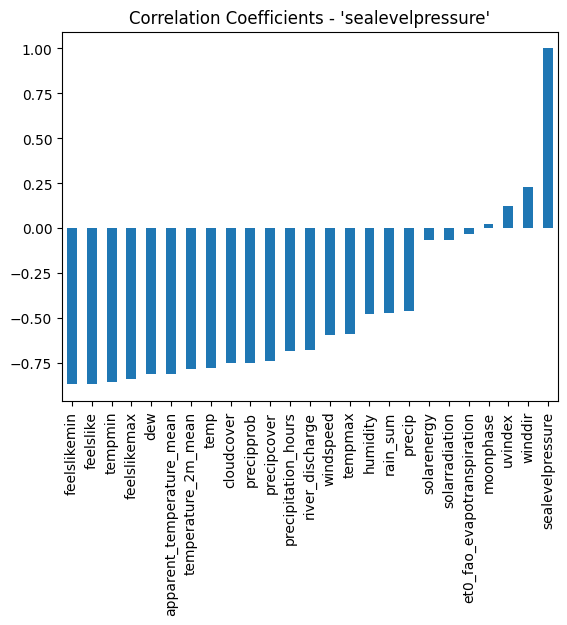

In [69]:
plt.title("Correlation Coefficients - 'sealevelpressure'")
cor['sealevelpressure'].sort_values().plot(kind='bar');

## **Building Model**
* Base and hyperparameter tuned models were created for XGBRegressor, RandomForestRegressor, and CatBoostRegressor with the entire features and the RFE selected features
* The best model among 12 models was the CatBoostRegressor using the entire features.

**Entire Features**
* ['temp', 'feelslike', 'dew', 'humidity', 'precipprob', 'winddir', 'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy', 'uvindex', 'moonphase', 'river_discharge', 'temperature_2m_mean', 'apparent_temperature_mean', 'et0_fao_evapotranspiration', 'feelslikemin', 'feelslikemax', 'windspeed', 'tempmax', 'tempmin']

||Base RandomForestRegressor|Base XGBRegressor|Base CatBoostRegressor|
| --- | --- | --- | --- |
|R2|0.634132|0.443730|0.651134|
|MAE|2.533652|2.819204|2.553185|
|MSE|24.236212|36.849011|23.109964|
|RMSE|4.923029|6.070339|4.807282|

</p>

||Tuned RandomForestRegressor|Tuned XGBRegressor|Tuned CatBoostRegressor|
| --- | --- | --- | --- |
|R2|0.705606|0.556364|0.691634|
|MAE|2.331859|2.572388|2.543038|
|MSE|19.501526|29.387760|20.427124|
|RMSE|4.416053|5.421048|4.519638|

**RFE Selected Features**
* ['humidity', 'precipprob', 'sealevelpressure', 'solarradiation', 'uvindex', 'river_discharge', 'et0_fao_evapotranspiration', 'feelslikemin', 'feelslikemax', 'windspeed', 'tempmax']

||Base RandomForestRegressor with rfe|Base XGBRegressor with rfe|Base CatBoostRegressor with rfe|
| --- | --- | --- | --- |
|R2|0.598851|0.490352|0.655724|
|MAE|2.594044|2.791113|2.505697|
|MSE|26.573344|33.760593|22.805862|
|RMSE|5.154934|5.810387|4.775548|

</p>

||Tuned RandomForestRegressor with rfe|Tuned XGBRegressor with rfe|Tuned CatBoostRegressor with rfe|
| --- | --- | --- | --- |
|R2|0.534584|0.687356|0.675459|
|MAE|2.704308|2.383658|2.566589|
|MSE|30.830534|20.710492|21.498596|
|RMSE|5.552525|4.550878|4.636658|


### **Dataset Preparation**


In [27]:
# Drop the target variable, 'precip', and highly correlated variables 'rain_sum'
X_daily = daily_mean.drop(['precip', 'rain_sum'], axis=1)
# Predict 'precip'
y_daily = daily_mean[['precip']]

In [11]:
print(X_daily.shape, y_daily.shape)

(3881, 23) (3881, 1)


### **RFE Selected Dataset VS. the Entire Dataset**

### **Split Dataset - Train, Test, Validation**
* Train --> 2013 to 2019
* Test --> 2020 and 2021
* Validation --> 2022 and 2023

In [28]:
# Split train, test and validataion
# Train
X_train_daily = X_daily[X_daily.index.year.isin([yr for yr in range(2013, 2020, 1)])]
y_train_daily = y_daily[y_daily.index.year.isin([yr for yr in range(2013, 2020, 1)])]['precip'].values
# Test
X_test_daily = X_daily[X_daily.index.year.isin([2020, 2021])]
y_test_daily = y_daily[y_daily.index.year.isin([2020, 2021])]['precip'].values
# Validation
X_validation_daily = X_daily[X_daily.index.year.isin([2022, 2023])]
y_validation_daily = y_daily[y_daily.index.year.isin([2022, 2023])]['precip'].values

In [23]:
# Check the shape
print(X_train_daily.shape, y_train_daily.shape)
print(X_test_daily.shape, y_test_daily.shape)
print(X_validation_daily.shape, y_validation_daily.shape)

(2556, 23) (2556,)
(731, 23) (731,)
(594, 23) (594,)


### **Normalize the Dataset**

In [30]:
# Normalize train, test and validation datasets
scaler = MinMaxScaler().fit(X_train_daily)
X_train_daily_scaled = scaler.transform(X_train_daily)
X_test_daily_scaled = scaler.transform(X_test_daily)
X_validation_daily_scaled = scaler.transform(X_validation_daily)

In [52]:
# Create DataFrame
cols = X_train_daily.columns
X_train_daily_scaled = pd.DataFrame(X_train_daily_scaled, columns=cols)
X_test_daily_scaled = pd.DataFrame(X_test_daily_scaled, columns=cols)
X_validation_daily_scaled = pd.DataFrame(X_validation_daily_scaled, columns=cols)

In [59]:
X_validation_daily_scaled['datetime'] = idx
X_validation_daily_scaled.set_index('datetime', inplace=True)
X_validation_daily_scaled.head()

,temp,feelslike,dew,humidity,precipprob,precipcover,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,moonphase,river_discharge,temperature_2m_mean,apparent_temperature_mean,precipitation_hours,et0_fao_evapotranspiration,feelslikemin,feelslikemax,windspeed,tempmax,tempmin
datetime,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.248056,0.215877,0.453177,0.733755,0.0,0.0,0.730973,0.978661,0.308824,0.309376,0.311938,0.551724,0.969388,0.068950,0.239161,0.223062,0.0,0.313725,0.273155,0.187200,0.149235,0.226169,0.338515
2022-01-02,0.235744,0.207421,0.473244,0.778903,0.0,0.0,0.725536,0.941804,0.242910,0.336481,0.335045,0.482759,1.000000,0.067907,0.239161,0.226843,0.0,0.316078,0.263330,0.145417,0.134561,0.185909,0.318941
2022-01-03,0.247797,0.215678,0.442308,0.722785,0.0,0.0,0.729613,0.900097,0.196691,0.393246,0.391528,0.586207,0.000000,0.067046,0.237762,0.227788,0.0,0.323922,0.259594,0.162041,0.114580,0.213736,0.321244
2022-01-04,0.241317,0.211202,0.412207,0.682278,0.0,0.0,0.745470,0.903977,0.146796,0.390580,0.388960,0.551724,0.051020,0.059596,0.233566,0.224953,0.0,0.331765,0.265175,0.172674,0.089291,0.213144,0.306275
2022-01-05,0.257906,0.223538,0.451505,0.699156,0.0,0.0,0.818786,0.863240,0.148897,0.435570,0.433890,0.586207,0.081633,0.049462,0.220979,0.217391,0.0,0.327451,0.243035,0.182059,0.118639,0.214328,0.271157


In [65]:
X_validation_daily_scaled[X_validation_daily_scaled.index == '2022-01-02']

,temp,feelslike,dew,humidity,precipprob,precipcover,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,moonphase,river_discharge,temperature_2m_mean,apparent_temperature_mean,precipitation_hours,et0_fao_evapotranspiration,feelslikemin,feelslikemax,windspeed,tempmax,tempmin
datetime,,,,,,,,,,,,,,,,,,,,,,,
2022-01-02,0.235744,0.207421,0.473244,0.778903,0.0,0.0,0.725536,0.941804,0.24291,0.336481,0.335045,0.482759,1.0,0.067907,0.239161,0.226843,0.0,0.316078,0.26333,0.145417,0.134561,0.185909,0.318941


In [55]:
# save X_validation_daily_scaled as a CSV file for use with a web app
idx = X_daily.index[X_daily.index.year.isin([2022, 2023])]
X_validation_daily_scaled['datetime'] = idx
X_validation_daily_scaled.to_csv("G:/My Drive/plotly_map/src/apps/validation.csv", index=False)
y_daily[y_daily.index.year.isin([2022, 2023])].reset_index().to_csv("G:/My Drive/plotly_map/src/apps/actual.csv", index=False)
X_validation_daily_scaled.reset_index().drop('index', axis=1, inplace=True)

### **Build Base Models with the Entire Dataset**
* RandomForestRegressor
* XGBRegressor
* CatBoostRegressor

In [17]:
# Function to fit a model
def fit_model(model, X_training, y_training, random_state=327):
    fitted_model = model.fit(X_training, y_training)
    return fitted_model

# Function to create a model and return prediction
def get_prediction(fitted_model, X_testing):
    pred = fitted_model.predict(X_testing)
    return pred

# Function to evaluate model
def evaluate_model(metric, prediction, y_testing):
    return metric(y_testing, prediction)

In [36]:
models = [RandomForestRegressor(), xgb.XGBRegressor(), CatBoostRegressor()]
model_names = ['RandomForestRegressor', 'XGBRegressor', 'CatBoostRegressor']
metrics = [r2_score, mean_absolute_error, mean_squared_error]
predictions_daily = {}
score_results_daily = {}

for i in range(len(models)):
    model = fit_model(models[i], X_train_daily_scaled, y_train_daily)
    pred = get_prediction(model, X_test_daily_scaled)
    predictions_daily[model_names[i]] = pred
    scores = []
    for j in range(len(metrics)):
        scores.append(evaluate_model(metrics[j], pred, y_test_daily))
        if metrics[j] == mean_squared_error:
            scores.append(np.sqrt(evaluate_model(metrics[j], pred, y_test_daily)))
    score_results_daily[model_names[i]] = scores

Learning rate set to 0.047487
0:	learn: 10.4871148	total: 4.97ms	remaining: 4.97s
1:	learn: 10.2178452	total: 11.6ms	remaining: 5.8s
2:	learn: 9.9764192	total: 28.1ms	remaining: 9.34s
3:	learn: 9.7289129	total: 43.2ms	remaining: 10.8s
4:	learn: 9.4880242	total: 53.5ms	remaining: 10.7s
5:	learn: 9.2713851	total: 60.5ms	remaining: 10s
6:	learn: 9.0676292	total: 65.1ms	remaining: 9.24s
7:	learn: 8.8632050	total: 71.7ms	remaining: 8.89s
8:	learn: 8.6798656	total: 76.7ms	remaining: 8.44s
9:	learn: 8.5135695	total: 82.8ms	remaining: 8.2s
10:	learn: 8.3491252	total: 89.1ms	remaining: 8.02s
11:	learn: 8.1791703	total: 93.4ms	remaining: 7.69s
12:	learn: 8.0255536	total: 98.8ms	remaining: 7.5s
13:	learn: 7.8970681	total: 104ms	remaining: 7.3s
14:	learn: 7.7750517	total: 110ms	remaining: 7.22s
15:	learn: 7.6445973	total: 116ms	remaining: 7.11s
16:	learn: 7.5150664	total: 120ms	remaining: 6.93s
17:	learn: 7.4128969	total: 128ms	remaining: 6.97s
18:	learn: 7.3121537	total: 134ms	remaining: 6.9s
19:

### **Performance Metrics for Base Models with the Entire Dataset***
* RandomForestRegressor
* XGBRegressor
* XGBRFRegressor

In [44]:
# Base model performance scores
metrics.append('root mean squared error')
df_base = pd.DataFrame(score_results_daily, index=['R2', 'MAE', 'MSE', 'RMSE'])
df_base

,RandomForestRegressor,XGBRegressor,CatBoostRegressor
R2,0.634132,0.443730,0.651134
MAE,2.533652,2.819204,2.553185
MSE,24.236212,36.849011,23.109964
RMSE,4.923029,6.070339,4.807282


### **Hyperparameter Tuning with the Entire Dataset**	

* RandomForestRegressor model
* best_rfr_params = {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}

-- Skip the below cell from the next time

In [ ]:
# Define the parameter grid
rfr_params = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': [None, 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rfr_model = RandomForestRegressor(random_state=327)

# Instantiate the random search model
rfr_random_search = RandomizedSearchCV(estimator=rfr_model, 
                                       param_distributions=rfr_params, 
                                       n_iter=100, 
                                       cv=5, 
                                       verbose=2, 
                                       n_jobs=-1)

# Fit rfr_random_search and get the best hyperparameters
rfr_random_search.fit(X_train_daily_scaled, y_train_daily)
best_rfr_params = rfr_random_search.best_params_

# Create RandomForestRegressor with the best hyperparameters
best_rfr_model = RandomForestRegressor(**best_rfr_params)

# Train the model
best_rfr_model.fit(X_train_daily_scaled, y_train_daily)

In [ ]:
print(best_rfr_params)

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


-- Run the below cell to create the best RandomForestRegressor model

In [37]:
# Best hyperparameters for RandomForestRegressor
best_rfr_params = {'n_estimators': 1000, 
                   'min_samples_split': 5, 
                   'min_samples_leaf': 4, 
                   'max_features': 'sqrt', 
                   'max_depth': 90, 
                   'bootstrap': True}
# Best RandomForestRegressor model
best_rfr_model = RandomForestRegressor(**best_rfr_params)
# Train the model
best_rfr_model.fit(X_train_daily_scaled, y_train_daily)

RandomForestRegressor(max_depth=90, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1000)

* XGBoostRegressor
* best_xgb_params = {'reg_lambda': 3, 'reg_alpha': 2, 'objective': 'reg:squarederror', 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8, 'booster': 'gbtree'}

-- Skip the below cell from the next time

In [102]:
# Define the parameter grid
xgb_params = {
    'objective': ['reg:squarederror'],
    'booster': ['gbtree', 'gblinear'],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'min_child_weight': [1, 2, 3],
    'colsample_bytree': [0.8, 0.9, 1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.5, 1, 2],
    'reg_lambda': [1, 2, 3],
    'gamma': [0, 1, 2]
}

# Create an XGBRegressor object
xgb_model = xgb.XGBRegressor(random_state=327)

# Create a RandomizedSearchCV object
xgb_random_search = RandomizedSearchCV(
                    estimator=xgb_model,
                    param_distributions=xgb_params,
                    n_iter=100,
                    cv=5,
                    scoring='neg_mean_absolute_error',
                    verbose=5,
                    n_jobs=12
)

# Fit xgb_random_search and get the best hyperparameters
xgb_random_search.fit(X_train_daily_scaled, y_train_daily)
best_xgb_params = xgb_random_search.best_params_

# Create xgb.XGBRegressor with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_xgb_params)

# Train the model
best_xgb_model.fit(X_train_daily_scaled, y_train_daily)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [103]:
print(best_xgb_params)

{'reg_lambda': 3, 'reg_alpha': 2, 'objective': 'reg:squarederror', 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8, 'booster': 'gbtree'}


-- Run the below cell to create the best XGBRegressor model

In [38]:
# Best hyperparameters for XGBRegressor
best_xgb_params = {'reg_lambda': 3, 
                   'reg_alpha': 2, 
                   'objective': 'reg:squarederror', 
                   'n_estimators': 300, 
                   'min_child_weight': 1, 
                   'max_depth': 15, 
                   'learning_rate': 0.1, 
                   'gamma': 1, 
                   'colsample_bytree': 0.8, 
                   'booster': 'gbtree'}
# Create xgb.XGBRegressor with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_xgb_params)

# Train the model
best_xgb_model.fit(X_train_daily_scaled, y_train_daily)               

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

* CatBoostRegressor
* best_cbr_model = {'learning_rate': 0.05, 'iterations': 50, 'depth': 6}

-- Skip the below cell from the next time

In [100]:
# Define the hyperparameter search space
cbr_params = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100]
}

cbr_model = CatBoostRegressor(has_time=True, random_state=327)

# Create a RandomizedSearchCV object
cbr_random_search = RandomizedSearchCV(
                      estimator=cbr_model,
                      param_distributions=cbr_params,
                      n_iter=100,
                      cv=5,
                      verbose=2,
                      n_jobs=-1
)

# Fit xgbrf_random_search and get the best hyperparameters
cbr_random_search.fit(X_train_daily_scaled, y_train_daily)
best_cbr_params = cbr_random_search.best_params_

# Create xgb.XGBRegressor with the best hyperparameters
best_cbr_model = CatBoostRegressor(**best_cbr_params)

# Train the model
best_cbr_model.fit(X_train_daily_scaled, y_train_daily)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


0:	learn: 10.4567167	total: 10.9ms	remaining: 533ms
1:	learn: 10.1872981	total: 26.2ms	remaining: 628ms
2:	learn: 9.9323934	total: 37.9ms	remaining: 593ms
3:	learn: 9.6768588	total: 49.5ms	remaining: 570ms
4:	learn: 9.4291195	total: 59.5ms	remaining: 536ms
5:	learn: 9.2053223	total: 67.6ms	remaining: 495ms
6:	learn: 8.9891694	total: 76.8ms	remaining: 472ms
7:	learn: 8.8005469	total: 86.1ms	remaining: 452ms
8:	learn: 8.6193641	total: 97.9ms	remaining: 446ms
9:	learn: 8.4476776	total: 108ms	remaining: 432ms
10:	learn: 8.2883804	total: 120ms	remaining: 425ms
11:	learn: 8.1287083	total: 131ms	remaining: 413ms
12:	learn: 7.9783572	total: 141ms	remaining: 400ms
13:	learn: 7.8403424	total: 152ms	remaining: 391ms
14:	learn: 7.7152767	total: 162ms	remaining: 377ms
15:	learn: 7.5826637	total: 172ms	remaining: 365ms
16:	learn: 7.4650217	total: 181ms	remaining: 352ms
17:	learn: 7.3476509	total: 190ms	remaining: 337ms
18:	learn: 7.2354532	total: 204ms	remaining: 333ms
19:	learn: 7.1281849	total: 21

In [101]:
print(best_cbr_params)

{'learning_rate': 0.05, 'iterations': 50, 'depth': 6}


-- Run the below cell to create the best XGBRegressor model

In [39]:
# Best hyperparameters for XGBRegressor
best_cbr_params = {'learning_rate': 0.05, 'iterations': 50, 'depth': 6, 'has_time': True}
# Create xgb.XGBRegressor with the best hyperparameters
best_cbr_model = CatBoostRegressor(**best_cbr_params)

# Train the model
best_cbr_model.fit(X_train_daily_scaled, y_train_daily)               

0:	learn: 10.4730633	total: 14.9ms	remaining: 728ms
1:	learn: 10.1904456	total: 22ms	remaining: 527ms
2:	learn: 9.9158007	total: 33.3ms	remaining: 522ms
3:	learn: 9.6592339	total: 39.8ms	remaining: 458ms
4:	learn: 9.4158185	total: 49.3ms	remaining: 444ms
5:	learn: 9.1913259	total: 58ms	remaining: 426ms
6:	learn: 8.9716278	total: 67.8ms	remaining: 417ms
7:	learn: 8.7617327	total: 76ms	remaining: 399ms
8:	learn: 8.5648257	total: 83.8ms	remaining: 382ms
9:	learn: 8.3969929	total: 92.1ms	remaining: 368ms
10:	learn: 8.2287760	total: 102ms	remaining: 360ms
11:	learn: 8.0554748	total: 110ms	remaining: 348ms
12:	learn: 7.8977338	total: 119ms	remaining: 338ms
13:	learn: 7.7671815	total: 127ms	remaining: 327ms
14:	learn: 7.6264912	total: 134ms	remaining: 313ms
15:	learn: 7.4982325	total: 141ms	remaining: 301ms
16:	learn: 7.3793818	total: 149ms	remaining: 288ms
17:	learn: 7.2637302	total: 163ms	remaining: 290ms
18:	learn: 7.1634980	total: 196ms	remaining: 320ms
19:	learn: 7.0574665	total: 213ms	r

36:	learn: 5.8498559	total: 378ms	remaining: 133ms
37:	learn: 5.7912701	total: 413ms	remaining: 130ms
38:	learn: 5.7475772	total: 428ms	remaining: 121ms
39:	learn: 5.7018870	total: 436ms	remaining: 109ms
40:	learn: 5.6514760	total: 445ms	remaining: 97.7ms
41:	learn: 5.6157632	total: 453ms	remaining: 86.2ms
42:	learn: 5.5773432	total: 461ms	remaining: 75.1ms
43:	learn: 5.5417999	total: 470ms	remaining: 64ms
44:	learn: 5.4952601	total: 479ms	remaining: 53.2ms
45:	learn: 5.4634996	total: 488ms	remaining: 42.4ms
46:	learn: 5.4271855	total: 498ms	remaining: 31.8ms
47:	learn: 5.3983200	total: 508ms	remaining: 21.2ms
48:	learn: 5.3719556	total: 516ms	remaining: 10.5ms
49:	learn: 5.3398883	total: 525ms	remaining: 0us


### **Performance Metrics for the Best Models with the Entire Dataset**
* RandomForestRegressor
* XGBRegressor
* CatBoostRegressor

In [40]:
# Fit the RandomizedSearchCV object to the data
tuned_models = [best_rfr_model, best_xgb_model, best_cbr_model]
tuned_model_names = ['Tuned RandomForestRegressor', 'Tuned XGBRegressor', 'Tuned CatBoostRegressor']
metrics = [r2_score, mean_absolute_error, mean_squared_error]
tuned_predictions_daily = {}
tuned_score_results_daily = {}

for i in range(len(tuned_models)):
    model = tuned_models[i]
    pred = get_prediction(model, X_test_daily_scaled)
    tuned_predictions_daily[tuned_model_names[i]] = pred
    scores = []
    for j in range(len(metrics)):
        scores.append(evaluate_model(metrics[j], pred, y_test_daily))
        if metrics[j] == mean_squared_error:
            scores.append(np.sqrt(evaluate_model(metrics[j], pred, y_test_daily)))
    tuned_score_results_daily[tuned_model_names[i]] = scores

In [41]:
print("Performance Score for 'daily_mean' with the entire dataset")
df_tuned = pd.DataFrame(tuned_score_results_daily, index=['R2', 'MAE', 'MSE', 'RMSE'])
df_tuned

Performance Score for 'daily_mean' with the entire dataset


,Tuned RandomForestRegressor,Tuned XGBRegressor,Tuned CatBoostRegressor
R2,0.705606,0.556364,0.691634
MAE,2.331859,2.572388,2.543038
MSE,19.501526,29.387760,20.427124
RMSE,4.416053,5.421048,4.519638


### **Feature Selection - RFECV**
* RFE selected 17 features out of 23
    * 'humidity',
    * 'precipcover',
    * 'sealevelpressure',
    * 'cloudcover',
    * 'solarradiation',
    * 'solarenergy',
    * 'uvindex',
    * 'moonphase',
    * 'river_discharge',
    * 'temperature_2m_mean',
    * 'precipitation_hours',
    * 'et0_fao_evapotranspiration',
    * 'feelslikemin',
    * 'feelslikemax',
    * 'windspeed',
    * 'tempmax',
    * 'tempmin' 

In [18]:
# Function to return selected features
def get_rfecv_score(X_training, y_training):
    selected_features = []
    rfe = RFECV(estimator=xgb.XGBRegressor(), cv=4, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    rfe.fit(X_training, y_training)

    for i in range(X_training.shape[1]):
        if rfe.support_[i]:
            selected_features.append(X_training.columns[i])

    return selected_features

In [19]:
# Print features selected by RFE
selected_features = get_rfecv_score(X_train_daily_scaled, y_train_daily)

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.


In [20]:
selected_features

['humidity',
 'precipcover',
 'sealevelpressure',
 'cloudcover',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'moonphase',
 'river_discharge',
 'temperature_2m_mean',
 'precipitation_hours',
 'et0_fao_evapotranspiration',
 'feelslikemin',
 'feelslikemax',
 'windspeed',
 'tempmax',
 'tempmin']

In [21]:
# Dataframe with the selected columns
X_train_daily_rfe = X_train_daily_scaled[selected_features]
X_test_daily_rfe = X_test_daily_scaled[selected_features]
X_validation_daily_rfe = X_validation_daily_scaled[selected_features]

In [22]:
# Check the shape
print(X_train_daily_rfe.shape, y_train_daily.shape)
print(X_test_daily_rfe.shape, y_test_daily.shape)
print(X_validation_daily_rfe.shape, y_validation_daily.shape)
X_train_daily_rfe .head(3)

(2556, 17) (2556,)
(731, 17) (731,)
(594, 17) (594,)


,humidity,precipcover,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,moonphase,river_discharge,temperature_2m_mean,precipitation_hours,et0_fao_evapotranspiration,feelslikemin,feelslikemax,windspeed,tempmax,tempmin
0,0.565823,0.041675,0.699321,0.174107,0.300044,0.300385,0.482759,0.642857,0.070526,0.234965,0.0000,0.349020,0.270849,0.232728,0.115829,0.264062,0.211860
1,0.615190,0.020825,0.725509,0.094538,0.269940,0.267009,0.413793,0.683673,0.069338,0.278322,0.0000,0.322745,0.300554,0.232578,0.084608,0.295441,0.256189
2,0.654008,0.083325,0.775946,0.261817,0.107421,0.106547,0.241379,0.714286,0.068531,0.260140,0.0625,0.101569,0.324493,0.169878,0.044646,0.178804,0.404145


### **Build Base Models with RFE Selected Dataset**
* RandomForestRegressor
* XGBRegressor
* CatBoostRegressor

||XGBRegressor|RandomForestRegressor|CatBoostRegressor|
| --- | --- | --- | --- |
|R2|0.619417|0.443730|0.651134
|MAE|2.563677|2.819204|2.553185
|MSE|25.210971|36.849011|23.109964
|RMSE|5.021053|6.070339|4.807282

In [23]:
models = [xgb.XGBRegressor(), RandomForestRegressor(), CatBoostRegressor()]
model_names = ['XGBRegressor with rfe', 'RandomForestRegressor with rfe', 'CatBoostRegressor with rfe']
metrics = [r2_score, mean_absolute_error, mean_squared_error]
predictions_daily_rfe = {}
score_results_daily_rfe = {}

for i in range(len(models)):
    model = fit_model(models[i], X_train_daily_rfe, y_train_daily)
    pred = get_prediction(model, X_test_daily_rfe)
    predictions_daily_rfe[model_names[i]] = pred
    scores = []
    for j in range(len(metrics)):
        scores.append(evaluate_model(metrics[j], pred, y_test_daily))
        if metrics[j] == mean_squared_error:
            scores.append(np.sqrt(evaluate_model(metrics[j], pred, y_test_daily)))
    score_results_daily_rfe[model_names[i]] = scores

Learning rate set to 0.047487
0:	learn: 10.4765563	total: 168ms	remaining: 2m 47s
1:	learn: 10.2107433	total: 180ms	remaining: 1m 29s
2:	learn: 9.9702351	total: 196ms	remaining: 1m 5s
3:	learn: 9.7293197	total: 204ms	remaining: 50.7s
4:	learn: 9.5045601	total: 211ms	remaining: 42s
5:	learn: 9.2801904	total: 219ms	remaining: 36.3s
6:	learn: 9.0826465	total: 228ms	remaining: 32.3s
7:	learn: 8.8814981	total: 233ms	remaining: 28.9s
8:	learn: 8.6979230	total: 240ms	remaining: 26.4s
9:	learn: 8.5256502	total: 245ms	remaining: 24.3s
10:	learn: 8.3693422	total: 255ms	remaining: 22.9s
11:	learn: 8.2189478	total: 262ms	remaining: 21.5s
12:	learn: 8.0762370	total: 268ms	remaining: 20.4s
13:	learn: 7.9282633	total: 276ms	remaining: 19.4s
14:	learn: 7.8060984	total: 283ms	remaining: 18.6s
15:	learn: 7.6859365	total: 289ms	remaining: 17.8s
16:	learn: 7.5737356	total: 296ms	remaining: 17.1s
17:	learn: 7.4495624	total: 303ms	remaining: 16.5s
18:	learn: 7.3375494	total: 312ms	remaining: 16.1s
19:	learn

### **Performance Metrics for Base Models**
* RandomForestRegressor
* XGBRegressor
* CatBoostRegressor

In [24]:
# Base model performance scores
metrics.append('root mean squared error')
df_base_rfe = pd.DataFrame(score_results_daily_rfe, index=['R2', 'MAE', 'MSE', 'RMSE'])
df_base_rfe

,XGBRegressor with rfe,RandomForestRegressor with rfe,CatBoostRegressor with rfe
R2,0.490352,0.598851,0.655724
MAE,2.791113,2.594044,2.505697
MSE,33.760593,26.573344,22.805862
RMSE,5.810387,5.154934,4.775548


### **Hyperparameter Tuning with the RFE Selected Features**
* RandomForestRegressor
* XGBRegressor
* CatBoostRegressor

||Tuned XGBRegressor|Tuned RandomForestRegressor|Tuned CatBoostRegressor|
| --- | --- | --- | --- |
|R2|0.642937|0.604249|0.683968|
|MAE|2.612130|2.648482|2.576064|
|MSE|23.652920|26.215739|20.934923|
|RMSE|4.863427|5.120131|4.575470|

* RandomForestRegressor model
* best_rfr_params = {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}

-- Skip the below cell from the next time

In [25]:
# Define the parameter grid
rfr_params = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': [None, 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rfr_model = RandomForestRegressor(random_state=327)

# Instantiate the random search model
rfr_random_search = RandomizedSearchCV(estimator=rfr_model, 
                                       param_distributions=rfr_params, 
                                       n_iter=100, 
                                       cv=5, 
                                       verbose=2, 
                                       n_jobs=-1)

# Fit rfr_random_search and get the best hyperparameters
rfr_random_search.fit(X_train_daily_rfe, y_train_daily)
best_rfr_params = rfr_random_search.best_params_

# Create RandomForestRegressor with the best hyperparameters
best_rfr_model = RandomForestRegressor(**best_rfr_params)

# Train the model
best_rfr_model.fit(X_train_daily_rfe, y_train_daily)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=200)

In [26]:
print(best_rfr_params)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


-- Run the below cell to create the best RandomForestRegressor model

In [174]:
# Best hyperparameters for RandomForestRegressor
best_rfr_params = {'n_estimators': 200, 
                   'min_samples_split': 5, 
                   'min_samples_leaf': 4, 
                   'max_features': 'sqrt', 
                   'max_depth': 40, 
                   'bootstrap': True}
# Best RandomForestRegressor model
best_rfr_model = RandomForestRegressor(**best_rfr_params)
# Train the model
best_rfr_model.fit(X_train_daily_rfe, y_train_daily)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=600)

* XGBoostRegressor
* best_xgb_params = {'reg_lambda': 2, 'reg_alpha': 0.5, 'objective': 'reg:squarederror', 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1, 'booster': 'gbtree'}

-- Skip the below cell from the next time

In [27]:
# Define the parameter grid
xgb_params = {
    'objective': ['reg:squarederror'],
    'booster': ['gbtree', 'gblinear'],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'min_child_weight': [1, 2, 3],
    'colsample_bytree': [0.8, 0.9, 1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.5, 1, 2],
    'reg_lambda': [1, 2, 3],
    'gamma': [0, 1, 2]
}

# Create an XGBRegressor object
xgb_model = xgb.XGBRegressor(random_state=327)

# Create a RandomizedSearchCV object
xgb_random_search = RandomizedSearchCV(
                    estimator=xgb_model,
                    param_distributions=xgb_params,
                    n_iter=100,
                    cv=5,
                    scoring='neg_mean_absolute_error',
                    verbose=5,
                    n_jobs=12
)

# Fit xgb_random_search and get the best hyperparameters
xgb_random_search.fit(X_train_daily_rfe, y_train_daily)
best_xgb_params = xgb_random_search.best_params_

# Create xgb.XGBRegressor with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_xgb_params)

# Train the model
best_xgb_model.fit(X_train_daily_rfe, y_train_daily)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [28]:
print(best_xgb_params)

{'reg_lambda': 2, 'reg_alpha': 0.5, 'objective': 'reg:squarederror', 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1, 'booster': 'gbtree'}


-- Run the below cell to create the best XGBRegressor model

In [175]:
# Best hyperparameters for XGBRegressor
best_xgb_params = {'reg_lambda': 2, 
                   'reg_alpha': 0.5, 
                   'objective': 'reg:squarederror', 
                   'n_estimators': 100, 
                   'min_child_weight': 2, 
                   'max_depth': 5, 
                   'learning_rate': 0.1, 
                   'gamma': 0, 
                   'colsample_bytree': 1, 
                   'booster': 'gbtree'}
# Create xgb.XGBRegressor with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_xgb_params)

# Train the model
best_xgb_model.fit(X_train_daily_rfe, y_train_daily)               

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

* CatBoostRegressor
* best_cbr_model = {'learning_rate': 0.05, 'iterations': 50, 'depth': 8}

-- Skip the below cell from the next time

In [29]:
# Define the hyperparameter search space
cbr_params = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100]
}

cbr_model = CatBoostRegressor(has_time=True, random_state=327)

# Create a RandomizedSearchCV object
cbr_random_search = RandomizedSearchCV(
                      estimator=cbr_model,
                      param_distributions=cbr_params,
                      n_iter=100,
                      cv=5,
                      verbose=2,
                      n_jobs=-1
)

# Fit xgbrf_random_search and get the best hyperparameters
cbr_random_search.fit(X_train_daily_rfe, y_train_daily)
best_cbr_params = cbr_random_search.best_params_

# Create xgb.XGBRegressor with the best hyperparameters
best_cbr_model = CatBoostRegressor(**best_cbr_params)

# Train the model
best_cbr_model.fit(X_train_daily_rfe, y_train_daily)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 10.4597772	total: 29.3ms	remaining: 1.44s
1:	learn: 10.1850004	total: 55.4ms	remaining: 1.33s
2:	learn: 9.9078184	total: 79.7ms	remaining: 1.25s
3:	learn: 9.6521763	total: 100ms	remaining: 1.15s
4:	learn: 9.4222904	total: 126ms	remaining: 1.13s
5:	learn: 9.1850708	total: 145ms	remaining: 1.06s
6:	learn: 8.9867855	total: 181ms	remaining: 1.11s
7:	learn: 8.7917540	total: 207ms	remaining: 1.08s
8:	learn: 8.5825640	total: 227ms	remaining: 1.03s
9:	learn: 8.3971115	total: 249ms	remaining: 997ms
10:	learn: 8.2292203	total: 268ms	remaining: 951ms
11:	learn: 8.0694328	total: 295ms	remaining: 935ms
12:	learn: 7.9212324	total: 315ms	remaining: 897ms
13:	learn: 7.7706296	total: 340ms	remaining: 874ms
14:	learn: 7.6318932	total: 366ms	remaining: 855ms
15:	learn: 7.5135300	total: 391ms	remaining: 830ms
16:	learn: 7.3753283	total: 449ms	remaining: 871ms
17:	learn: 7.2577841	total: 473ms	remaining: 841ms
18:	learn: 7.1344169	tota

In [30]:
print(best_cbr_params)

{'learning_rate': 0.05, 'iterations': 50, 'depth': 8}


-- Run the below cell to create the best XGBRegressor model

In [176]:
# Best hyperparameters for XGBRegressor
best_cbr_params = {'learning_rate': 0.05, 'iterations': 50, 'depth': 8, 'has_time': True}
# Create xgb.XGBRegressor with the best hyperparameters
best_cbr_model = xgb.XGBRegressor(**best_xgb_params)

# Train the model
best_cbr_model.fit(X_train_daily_rfe, y_train_daily)               

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### **Performance Metrics for the Best Models**
* RandomForestRegressor
* XGBRegressor
* CatBoostRegressor

In [32]:
# Fit the RandomizedSearchCV object to the data
tuned_models = [best_rfr_model, best_xgb_model, best_cbr_model]
tuned_model_names = ['Tuned XGBRegressor with rfe', 'Tuned RandomForestRegressor with rfe', 'Tuned CatBoostRegressor with rfe']
metrics = [r2_score, mean_absolute_error, mean_squared_error]
tuned_predictions_daily_rfe = {}
tuned_score_results_daily_rfe = {}

for i in range(len(tuned_models)):
    model = tuned_models[i]
    pred = get_prediction(model, X_test_daily_rfe)
    tuned_predictions_daily_rfe [tuned_model_names[i]] = pred
    scores = []
    for j in range(len(metrics)):
        scores.append(evaluate_model(metrics[j], pred, y_test_daily))
        if metrics[j] == mean_squared_error:
            scores.append(np.sqrt(evaluate_model(metrics[j], pred, y_test_daily)))
    tuned_score_results_daily_rfe[tuned_model_names[i]] = scores

In [34]:
print("Performance Score for 'daily_mean' with RFE Selected Features")
df_tuned_rfe = pd.DataFrame(tuned_score_results_daily_rfe, index=['R2', 'MAE', 'MSE', 'RMSE'])
df_tuned_rfe

Performance Score for 'daily_mean' with RFE Selected Features


,Tuned XGBRegressor with rfe,Tuned RandomForestRegressor with rfe,Tuned CatBoostRegressor with rfe
R2,0.687356,0.534584,0.675459
MAE,2.383658,2.704308,2.566589
MSE,20.710492,30.830534,21.498596
RMSE,4.550878,5.552525,4.636658


## **Model Evaluation**
* Hyperparameter optimized RandomForestRegressor model is the best among 12 other models.

#### **The Best Model's Evaluation Metrics**
|R2|MAE|MSE|RMSE|
| --- | --- | --- | --- |
|0.705606|2.331859|19.501526|4.416053|

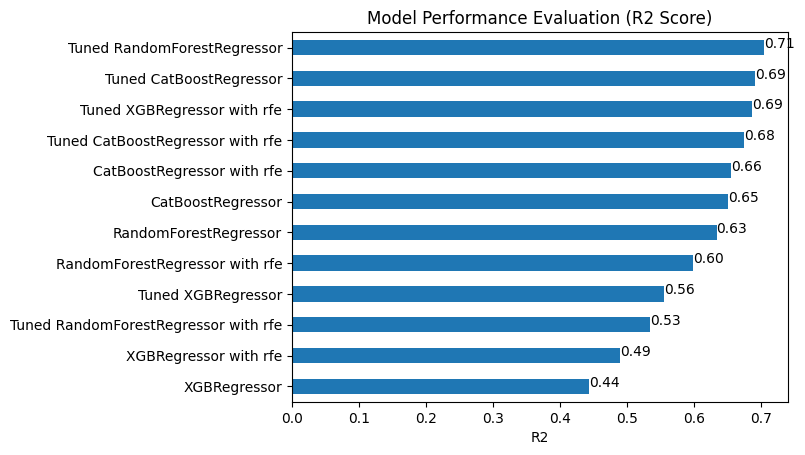

In [45]:
df_eval1 = pd.merge(df_base_rfe, df_tuned_rfe, left_index=True, right_index=True)
df_eval2 = pd.merge(df_base, df_tuned, left_index=True, right_index=True)
df_eval = pd.merge(df_eval1, df_eval2, left_index=True, right_index=True).T
r2 = df_eval.sort_values(('R2'))

plt.title("Model Performance Evaluation (R2 Score)")
r2['R2'].plot(kind='barh')
plt.xlabel("R2")
for i in range(len(df_eval)):
    plt.text(s=f"{r2['R2'][i]:.2f}", x=r2['R2'][i], y=i);

* Line plot of actual and forecast precipitation indicates that the model picks spikes and drops of precipitation pattern well. 

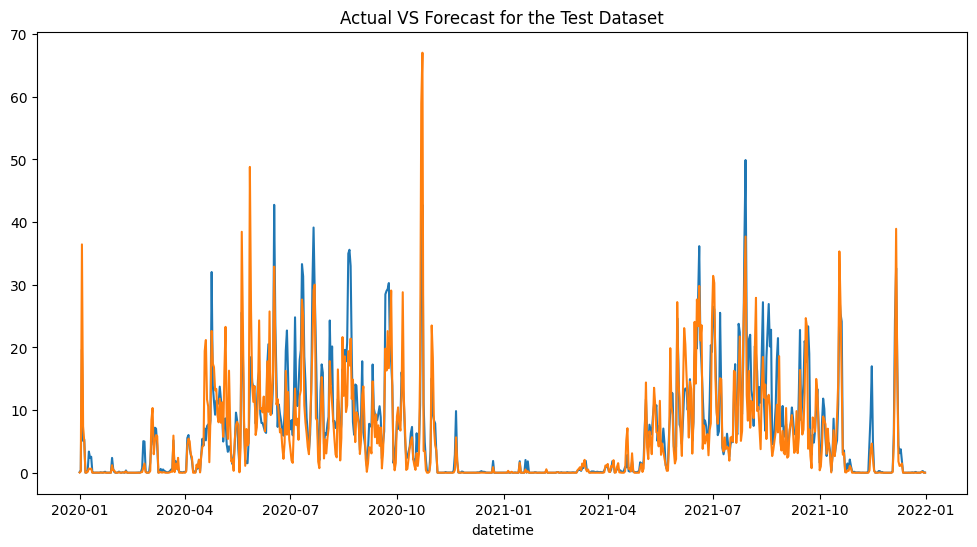

In [62]:
test_prediction = tuned_predictions_daily['Tuned RandomForestRegressor']
fig = plt.subplots(figsize=(12, 6))
plt.title("Actual VS Forecast for the Test Dataset")
sns.lineplot(x=X_test_daily.index, y=pd.Series(test_prediction))
sns.lineplot(x=X_test_daily.index, y=pd.Series(y_test_daily));

* Shap presentation shows the features in the order of how much each feature contributes to the output values.
* The top 5 features contribute to the prediction are 'precipitation_hours', 'humidity', 'precipcover', 'windspeed', and 'et0_fao_evapotranspiration'.
As those top 5 values increase, predicted 'precip' vakye also increases.

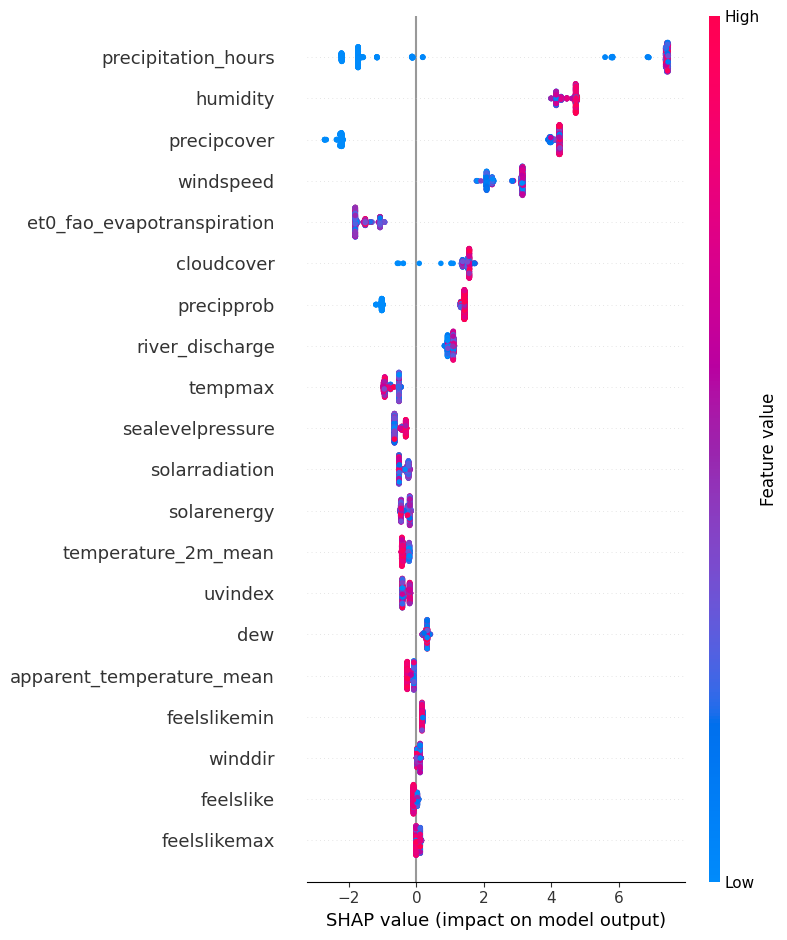

In [73]:
# Calculate SHAP values
explainer = shap.TreeExplainer(best_rfr_model)
shap_values = explainer.shap_values(X_test_daily)

# Plot SHAP values
shap.summary_plot(shap_values, X_test_daily)

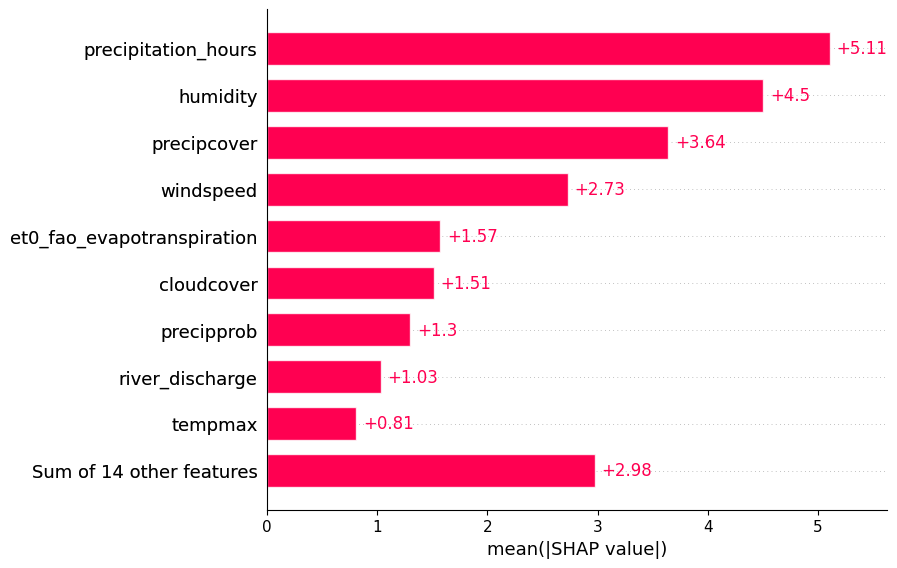

In [75]:
shap_values = explainer(X_test_daily)
shap.plots.bar(shap_values)

## **Save the Best Model as Pickle**

In [67]:
from joblib import dump

dump(best_rfr_model, 'best_model.pkl', compress=3)

['best_model.pkl']

In [69]:
with open('g:/My Drive/plotly_map/src/apps/artifactory/best_model.pkl', 'wb') as f:
    pickle.dump(best_rfr_model, f)

In [2]:
with open('g:/My Drive/plotly_map/src/apps/artifactory/best_model.pkl', 'rb') as file:
    best_rfr_model_pkl = pickle.load(file)


In [5]:
joblib.dump(best_rfr_model_pkl , 'g:/My Drive/plotly_map/src/apps/artifactory/best_rfr_model')

['g:/My Drive/plotly_map/src/apps/artifactory/best_rfr_model']

## **Create the csv file**
* Create a dataset with the predicted values for validation data and save it in csv

In [66]:
X_validation_daily.head()

,temp,feelslike,dew,humidity,precipprob,precipcover,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,moonphase,river_discharge,temperature_2m_mean,apparent_temperature_mean,precipitation_hours,et0_fao_evapotranspiration,feelslikemin,feelslikemax,windspeed,tempmax,tempmin
datetime,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,17.491667,17.463889,23.025,76.850,0.0,0.0,252.175,1019.275,29.400,158.200,13.700,6.75,0.95,72.3375,18.000,18.100,0.0,2.7450,11.683333,24.708333,12.0625,23.9875,13.6875
2022-01-02,17.227778,17.227778,23.625,79.525,0.0,0.0,250.375,1018.325,23.125,164.300,14.150,6.25,0.98,71.8525,18.000,18.200,0.0,2.7600,11.387500,23.545833,11.4750,23.1375,13.2625
2022-01-03,17.486111,17.458333,22.700,76.200,0.0,0.0,251.725,1017.250,18.725,177.075,15.250,7.00,0.00,71.4525,17.975,18.225,0.0,2.8100,11.275000,24.008333,10.6750,23.7250,13.3125
2022-01-04,17.347222,17.333333,21.800,73.800,0.0,0.0,256.975,1017.350,13.975,176.475,15.200,6.75,0.05,67.9900,17.900,18.150,0.0,2.8600,11.443056,24.304167,9.6625,23.7125,12.9875
2022-01-05,17.702778,17.677778,22.975,74.800,0.0,0.0,281.250,1016.300,14.175,186.600,16.075,7.00,0.08,63.2800,17.675,17.950,0.0,2.8325,10.776389,24.565278,10.8375,23.7375,12.2250


In [67]:
# Predict 'precip' using the validation dataset
pred_precip = best_rfr_model.predict(X_validation_daily_scaled)#X_validation_daily
# Extract 'datetime' from X_validation_daily
datetime = X_validation_daily.index

In [69]:
# Create the dataset
prediction_df = pd.DataFrame(pred_precip, index=datetime, columns=['predicted_precip'])
prediction_df.head()

,predicted_precip
datetime,
2022-01-01,0.015773
2022-01-02,0.003994
2022-01-03,0.001924
2022-01-04,0.000311
2022-01-05,0.000921


In [70]:
# Save the dataset
prediction_df.reset_index(inplace=True)
prediction_df.to_.csv('./apps/predicted_precipitation.csv', index=False)

In [6]:
# Validate the dataset
prediction_df = pd.read_csv('../apps/predicted_precipitation.csv')
prediction_df.tail()

,datetime,predicted_precip
589,2023-08-13,26.838377
590,2023-08-14,10.201883
591,2023-08-15,6.986540
592,2023-08-16,7.167732
593,2023-08-17,4.336816
